In [3]:
# Carga de las librerías 
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Datos=pd.read_csv("../data/Datos_Transformados.csv")
Datos.head()

,Airline,Source,Destination,Duration,Total stops,Market,Date,Departure_Day,Departure_Month,Departure_Year,Price
0,Delta,NYC,PAR,610,1,NYC-PAR,2022-02-01,1,2,2022,369.9
1,Delta,NYC,PAR,660,1,NYC-PAR,2022-02-01,1,2,2022,369.9
2,Delta,NYC,PAR,665,1,NYC-PAR,2022-02-01,1,2,2022,369.9
3,Delta,NYC,PAR,685,1,NYC-PAR,2022-02-01,1,2,2022,369.9
4,Delta,NYC,PAR,690,1,NYC-PAR,2022-02-01,1,2,2022,369.9


In [5]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31211 entries, 0 to 31210
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          31211 non-null  object 
 1   Source           31211 non-null  object 
 2   Destination      31211 non-null  object 
 3   Duration         31211 non-null  int64  
 4   Total stops      31211 non-null  int64  
 5   Market           31211 non-null  object 
 6   Date             31211 non-null  object 
 7   Departure_Day    31211 non-null  int64  
 8   Departure_Month  31211 non-null  int64  
 9   Departure_Year   31211 non-null  int64  
 10  Price            31211 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ MB


## Normalizacion

variables Categorias Uso de Dummies

In [6]:
Airline = pd.get_dummies(Datos['Airline'],prefix='Air')

Airline

,Air_Aeroflot,Air_Air Canada,Air_Air France,Air_American Airlines,Air_British Airways,Air_Delta,Air_Emirates,Air_Finnair,"Air_Finnair, American Airlines",Air_KLM,Air_LOT,Air_Lufthansa,"Air_Lufthansa, Egypt Air",Air_Multiple Airlines,Air_Qatar Airways,Air_SAUDIA,Air_SWISS,Air_TAP AIR PORTUGAL,Air_Turkish Airlines,Air_United Airlines
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
Source = pd.get_dummies(Datos['Source'],prefix='Source')

Source

,Source_NYC,Source_PAR,Source_RUH,Source_SVO
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
31206,0,1,0,0
31207,0,1,0,0
31208,0,1,0,0
31209,0,1,0,0


In [8]:
Destination = pd.get_dummies(Datos['Destination'],prefix='Destination')

Destination

,Destination_NYC,Destination_PAR,Destination_RUH,Destination_SVO
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
31206,1,0,0,0
31207,1,0,0,0
31208,1,0,0,0
31209,1,0,0,0


In [20]:
#Unionde los Dataframe con todas las varibles tranformadas a dummies
Data=Datos[['Total stops','Departure_Day','Departure_Month','Departure_Year','Price']]
Data = pd.concat([Airline, Source, Destination,Data], axis = 1)
Data.head()

,Air_Aeroflot,Air_Air Canada,Air_Air France,Air_American Airlines,Air_British Airways,Air_Delta,Air_Emirates,Air_Finnair,"Air_Finnair, American Airlines",Air_KLM,...,Source_SVO,Destination_NYC,Destination_PAR,Destination_RUH,Destination_SVO,Total stops,Departure_Day,Departure_Month,Departure_Year,Price
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,2,2022,369.9


### Para normalizar las variables numericas
utilizaremos a MinMaxScaler que pertenece a sklearn y realiza la normalización min-max, que ajusta los datos a un rango específico. Por defecto, este rango es [0, 1]. El proceso consiste en restar el valor mínimo y luego dividir por la diferencia entre el valor máximo y el mínimo de los datos. Como resultado, los valores se escalan dentro del rango especificado, lo que puede ser útil cuando se desea conservar la forma de la distribución original.

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos
Data['Total stops'] = scaler.fit_transform(Data[['Total stops']])
Data['Departure_Day'] = scaler.fit_transform(Data[['Departure_Day']])
Data['Departure_Month'] = scaler.fit_transform(Data[['Departure_Month']])
Data['Departure_Year'] = scaler.fit_transform(Data[['Departure_Year']])
Data['Price'] = scaler.fit_transform(Data[['Price']])

Data

,Air_Aeroflot,Air_Air Canada,Air_Air France,Air_American Airlines,Air_British Airways,Air_Delta,Air_Emirates,Air_Finnair,"Air_Finnair, American Airlines",Air_KLM,...,Source_SVO,Destination_NYC,Destination_PAR,Destination_RUH,Destination_SVO,Total stops,Departure_Day,Departure_Month,Departure_Year,Price
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0.333333,0.000000,0.0,0.0,0.019778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31206,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.333333,0.966667,1.0,0.0,0.022598
31207,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.333333,0.966667,1.0,0.0,0.022598
31208,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.333333,0.966667,1.0,0.0,0.022598
31209,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.333333,0.966667,1.0,0.0,0.022598


## Modelo

Dividimos los datos en dos conjuntos, uno de entrenamiento (80%) y otro de validación (20%):

In [29]:
train = Data.sample(frac = 0.8, random_state = 1983) # Esta aleatorización depende de pandas
test = Data.drop(train.index)

In [30]:
class Precios_boletos(Dataset):
    def __init__(self, dataframe):
        x = dataframe.iloc[:,0:32].values
        y = dataframe.iloc[:,32].values
    
        self.x_train = torch.tensor(x, dtype=torch.float32)
        self.y_train = torch.tensor(y, dtype=torch.float32)
        
    def __len__(self):
        return len(self.y_train)
    
    def __getitem__(self, idx):
        return self.x_train[idx], self.y_train[idx]

In [31]:
datos_train = Precios_boletos(train)
datos_test = Precios_boletos(test)

In [32]:
torch.random.manual_seed(1983) # Esta aleatorización depende de Torch

In [38]:
cargador_datos_train = DataLoader(datos_train, batch_size = 100, shuffle = True)
cargador_datos_test = DataLoader(datos_test, batch_size = 100, shuffle = True)

In [39]:
for i, (data, labels) in enumerate(cargador_datos_train):
  print(data.shape, labels.shape)
  print(data,labels)
  break;

torch.Size([100, 32]) torch.Size([100])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.8333, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.6667, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4667, 0.5000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.4333, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000,  ..., 0.8667, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2667, 1.0000, 0.0000]]) tensor([0.0323, 0.0380, 0.0168, 0.0275, 0.0491, 0.0675, 0.0278, 0.1317, 0.1334,
        0.1056, 0.1023, 0.1073, 0.0628, 0.1892, 0.0171, 0.1346, 0.0388, 0.0141,
        0.0519, 0.0570, 0.0318, 0.1442, 0.0388, 0.0171, 0.1019, 0.0310, 0.0252,
        0.2251, 0.0253, 0.1155, 0.0679, 0.0516, 0.0402, 0.0624, 0.0144, 0.0315,
        0.2168, 0.1916, 0.0267, 0.0525, 0.1902, 0.0436, 0.1056, 0.1047, 0.0700,
        0.0470, 0.0497, 0.0400, 0.0134, 0.0315, 0.0404, 0.0388, 0.0162, 0.0172,
        0.0258, 0.1056, 0.1025, 0.0055, 0.0202, 0.1883, 0.0251, 0.0519, 0.0039,
  

## RED

In [45]:
class RedPrecios(nn.Module):
    def __init__(self):
        super().__init__()
        #self.linear = nn.Linear(4,1)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32, 1)
            #nn.Linear(4, 8),
            #nn.ReLU(),
            #nn.Linear(8, 32),
            #nn.ReLU(),
            #nn.Linear(32, 1),
        )

    def forward(self, x):
        y_pred = self.linear_relu_stack(x)
        return y_pred

In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [47]:
torch.random.manual_seed(1984) # Esta aleatorización depende de Torch
modelo = RedPrecios().to(device)
print(modelo)

RedPrecios(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [48]:
for name, param in modelo.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear_relu_stack.0.weight tensor([[-0.0914,  0.0725, -0.0075,  0.0359, -0.0205, -0.1194,  0.0240,  0.0035,
         -0.1231,  0.0947, -0.0586,  0.1536,  0.0717, -0.0595, -0.1421,  0.0626,
          0.0782,  0.1666, -0.0333,  0.1472, -0.0905,  0.0799,  0.1246, -0.0169,
          0.0354, -0.1339,  0.0725, -0.0378,  0.0937, -0.0049, -0.1357,  0.0621]])
linear_relu_stack.0.bias tensor([-0.1089])


In [50]:
Data.tail(1).values

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.96666667,
        1.        , 0.        , 0.02259776]])

In [51]:
X = torch.tensor([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.96666667,
        1.        , 0.], device=device)
with torch.no_grad():
    print(modelo(X))

tensor([0.0637])


## Entrenamiento

In [55]:
# Initialize the loss function
fn_perdida = nn.MSELoss(reduction = 'mean')

Optimizador

In [52]:
optimizador = torch.optim.Adam(modelo.parameters(), lr = 0.001)

In [53]:
def ciclo_entrenamiento(dataloader, model, loss_fun, optimizer, monitoreo = False):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        # Calcular las predicciones y la pérdida:
        pred = model(X)[:,-1]
        #print(f"Size Y_pred = {pred.shape}")
        #print(f"Size Y_target = {y.unsqueeze(1).shape}")
        perdida = loss_fun(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        perdida.backward()
        optimizer.step()
        
        if monitoreo:
            if (batch + 1) / num_batches == 1:
                perdida = perdida.item()
                actual =  (batch + 1)
                print(f"Pérdida: {perdida:>0.6f} [{actual:>5d} / {num_batches:>5d}]")
            

def ciclo_testing(dataloader, model, loss_fun, monitoreo = False):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)[:,-1]
            test_loss += loss_fun(pred, y).item()           
    test_loss /= num_batches
    
    if monitoreo:
        print(f"Test Error:  {test_loss:>0.6f}, \n")

In [56]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    ciclo_entrenamiento(cargador_datos_train, modelo, fn_perdida, optimizador)
    ciclo_testing(cargador_datos_test, modelo, fn_perdida)
print("Done!")

Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
Epoch 11
-------------------------------
Epoch 12
-------------------------------
Epoch 13
-------------------------------
Epoch 14
-------------------------------
Epoch 15
-------------------------------
Epoch 16
-------------------------------
Epoch 17
-------------------------------
Epoch 18
-------------------------------
Epoch 19
-------------------------------
Epoch 20
-------------------------------
Epoch 21
-------------------------------
Epoch 22
-------------------------------
Epoch 23
-------------------------------
Epoch 24
-------------------------------
Epoch 25
----------------

In [58]:
# Predicciones en entrenamiento:
X_train = np.array(train.iloc[:, 0:32], dtype = 'float32')
with torch.no_grad():
    y_pred_train = modelo(torch.tensor(X_train))[:,-1]

X_test = np.array(test.iloc[:, 0:32], dtype = 'float32')
with torch.no_grad():
    y_pred_test = modelo(torch.tensor(X_test))[:,-1]


correlacion_train = np.corrcoef(y_pred_train.numpy(), np.array(train['Price']))
print(f"La correlación en training es {correlacion_train[0,1]:>0.2f} ")

correlacion_test = np.corrcoef(y_pred_test.numpy(), np.array(test['Price']))
print(f"La correlación en test es {correlacion_test[0,1]:>0.2f} ")

La correlación en training es 0.65 
La correlación en test es 0.66 


In [59]:
#Parametros ajustados
for name, param in modelo.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear_relu_stack.0.weight tensor([[-7.9335e-03, -2.0145e-02,  2.5886e-02,  4.5237e-02,  2.5147e-02,
          1.9982e-02, -5.0288e-03,  1.4051e-02,  1.2563e-01,  6.2695e-03,
         -1.3975e-02, -2.5985e-02,  5.8273e-02,  1.0132e-01,  1.2416e-02,
         -1.5427e-02, -1.4954e-02, -6.0694e-02, -2.6944e-02, -1.6943e-02,
          7.2337e-02,  7.3421e-02,  3.3949e-02,  1.8939e-02,  8.1080e-02,
         -1.0285e-03,  1.9279e-02, -7.5387e-03, -1.4676e-02,  9.0874e-05,
         -2.2958e-03,  6.2061e-02]])
linear_relu_stack.0.bias tensor([-0.0206])


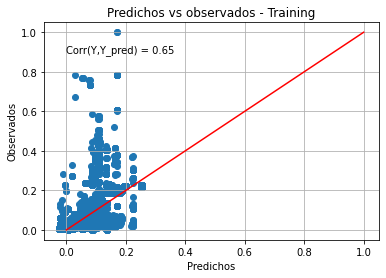

In [60]:
t = np.linspace(0,1,20)
text_cor_train = 'Corr(Y,Y_pred) = ' + str(np.round(correlacion_train[0,1],2))
plt.scatter(y_pred_train, train['Price'])
plt.plot(t, t, 'r-')
plt.text(0,0.9,text_cor_train)
plt.xlabel('Predichos')
plt.ylabel('Observados')
plt.title('Predichos vs observados - Training')
plt.grid()
plt.show()

In [61]:
S = torch.tensor([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.96666667,
        1.        , 0.], device=device)
with torch.no_grad():
    print(modelo(S))

tensor([0.0661])


In [63]:
modelo(S).item()

0.06611206382513046

In [65]:
scaler.inverse_transform(modelo(S).item())

ValueError: Expected 2D array, got scalar array instead:
array=0.06611206382513046.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.